In [2]:
import pandas as pd

In [3]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [4]:
fake['label'] = 0
true['label'] = 1

In [5]:
df = pd.concat([fake,true]).sample(frac=1).reset_index(drop=True)
print(df)

                                                   title  \
0      POLICE IN GERMANY BEGIN RAIDS On Homes Of Face...   
1      DEMOCRAT CONGRESSWOMAN, WIFE OF FELON Threaten...   
2       Trump Now Has An EVEN WORSE Excuse For Why He...   
3      Forbidden in China, but Trump skirts 'Great Fi...   
4      Cruz & Kasich Quit: Trump Crushes Elite Establ...   
...                                                  ...   
44893  Connecticut Senate passes bill allowing purcha...   
44894  China's former U.N. ambassador moved to Taiwan...   
44895  Turkey to detain 79 former teachers in post-co...   
44896   Three Key States Turn Themselves SOLIDLY Blue...   
44897  Republican donor backs clean energy senators w...   

                                                    text       subject  \
0      If Facebook has aligned themselves with German...      politics   
1      .@SpeakerRyan the women of America are watchin...      politics   
2      Donald Trump never runs out of new ways to dis... 

In [6]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/omer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
stop = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]','',text)
    text = text.lower()
    return " ".join([w for w in text.split() if w not in stop])
df['text'] = df['text'].apply(clean_text)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['text'],df['label'],test_size=0.2,random_state=42)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_vec, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = model.predict(x_test_vec)
print('accuracy: ',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy:  0.9894209354120267
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4634
           1       0.99      0.99      0.99      4346

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



<function matplotlib.pyplot.show(close=None, block=None)>

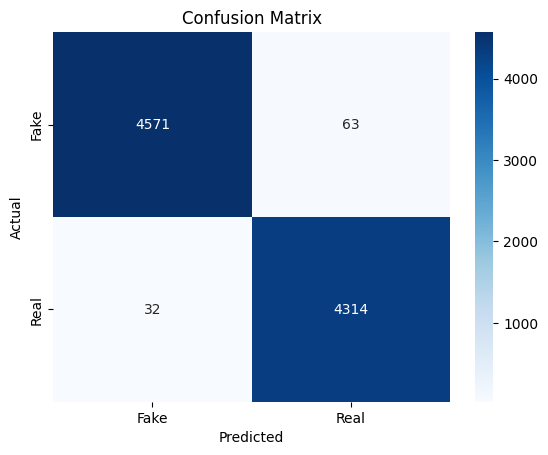

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Fake','Real'],yticklabels=['Fake','Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

In [13]:
def predict_news(text):
    clean = clean_text(text)
    vec = vectorizer.transform([clean])
    pred = model.predict(vec)[0]
    proba = model.predict_proba(vec)[0]
    label = 'REAL' if pred == 1 else 'FAKE'
    confidence = round(max(proba)*100,2)
    return f'{label}, confidence = {confidence}'

In [29]:
print(predict_news(''))

FAKE, confidence = 99.75


In [14]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(model, f)
with open('vectorizer.pkl','wb') as f:
    pickle.dump(vectorizer, f)